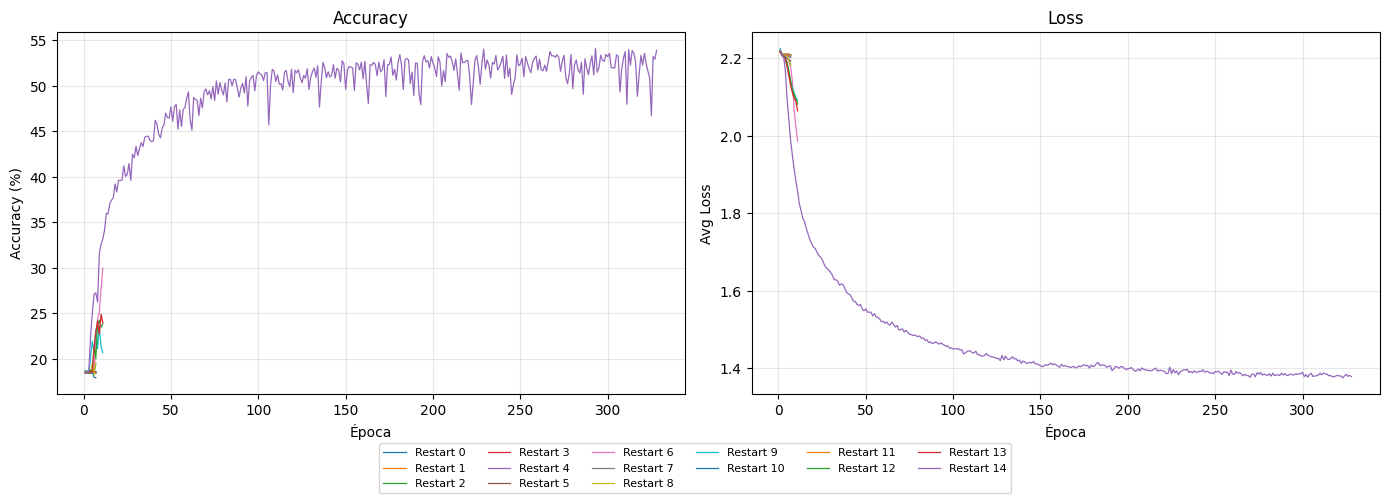

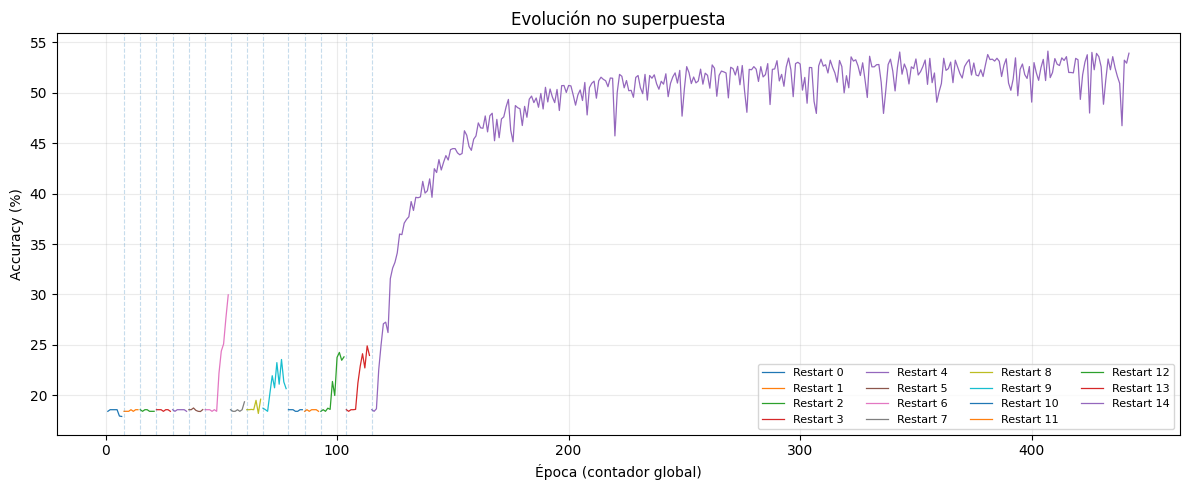

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby

# 1) Pega aquí tu log completo
log_text = """\

===== Epoch 1 (Restart 0) =====
Epoch 1: Avg Loss = 2.2189, Test Accuracy = 18.41%

===== Epoch 2 (Restart 0) =====
Epoch 2: Avg Loss = 2.2101, Test Accuracy = 18.57%

===== Epoch 3 (Restart 0) =====
Epoch 3: Avg Loss = 2.2069, Test Accuracy = 18.57%

===== Epoch 4 (Restart 0) =====
Epoch 4: Avg Loss = 2.2036, Test Accuracy = 18.57%

===== Epoch 5 (Restart 0) =====
Epoch 5: Avg Loss = 2.1988, Test Accuracy = 18.57%

===== Epoch 6 (Restart 0) =====
Epoch 6: Avg Loss = 2.1946, Test Accuracy = 17.94%

===== Epoch 7 (Restart 0) =====
Epoch 7: Avg Loss = 2.1855, Test Accuracy = 17.90%

!!! VERY EARLY RESTART 1 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 1) =====
Epoch 1: Avg Loss = 2.2164, Test Accuracy = 18.41%

===== Epoch 2 (Restart 1) =====
Epoch 2: Avg Loss = 2.2107, Test Accuracy = 18.41%

===== Epoch 3 (Restart 1) =====
Epoch 3: Avg Loss = 2.2107, Test Accuracy = 18.41%

===== Epoch 4 (Restart 1) =====
Epoch 4: Avg Loss = 2.2106, Test Accuracy = 18.57%

===== Epoch 5 (Restart 1) =====
Epoch 5: Avg Loss = 2.2092, Test Accuracy = 18.41%

===== Epoch 6 (Restart 1) =====
Epoch 6: Avg Loss = 2.2097, Test Accuracy = 18.57%

===== Epoch 7 (Restart 1) =====
Epoch 7: Avg Loss = 2.2095, Test Accuracy = 18.57%

!!! VERY EARLY RESTART 2 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 2) =====
Epoch 1: Avg Loss = 2.2157, Test Accuracy = 18.57%

===== Epoch 2 (Restart 2) =====
Epoch 2: Avg Loss = 2.2113, Test Accuracy = 18.41%

===== Epoch 3 (Restart 2) =====
Epoch 3: Avg Loss = 2.2110, Test Accuracy = 18.57%

===== Epoch 4 (Restart 2) =====
Epoch 4: Avg Loss = 2.2106, Test Accuracy = 18.57%

===== Epoch 5 (Restart 2) =====
Epoch 5: Avg Loss = 2.2107, Test Accuracy = 18.41%

===== Epoch 6 (Restart 2) =====
Epoch 6: Avg Loss = 2.2112, Test Accuracy = 18.41%

===== Epoch 7 (Restart 2) =====
Epoch 7: Avg Loss = 2.2093, Test Accuracy = 18.41%

!!! VERY EARLY RESTART 3 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 3) =====
Epoch 1: Avg Loss = 2.2184, Test Accuracy = 18.57%

===== Epoch 2 (Restart 3) =====
Epoch 2: Avg Loss = 2.2099, Test Accuracy = 18.57%

===== Epoch 3 (Restart 3) =====
Epoch 3: Avg Loss = 2.2090, Test Accuracy = 18.57%

===== Epoch 4 (Restart 3) =====
Epoch 4: Avg Loss = 2.2110, Test Accuracy = 18.41%

===== Epoch 5 (Restart 3) =====
Epoch 5: Avg Loss = 2.2110, Test Accuracy = 18.57%

===== Epoch 6 (Restart 3) =====
Epoch 6: Avg Loss = 2.2103, Test Accuracy = 18.57%

===== Epoch 7 (Restart 3) =====
Epoch 7: Avg Loss = 2.2061, Test Accuracy = 18.41%

!!! VERY EARLY RESTART 4 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 4) =====
Epoch 1: Avg Loss = 2.2152, Test Accuracy = 18.57%

===== Epoch 2 (Restart 4) =====
Epoch 2: Avg Loss = 2.2105, Test Accuracy = 18.41%

===== Epoch 3 (Restart 4) =====
Epoch 3: Avg Loss = 2.2104, Test Accuracy = 18.57%

===== Epoch 4 (Restart 4) =====
Epoch 4: Avg Loss = 2.2086, Test Accuracy = 18.57%

===== Epoch 5 (Restart 4) =====
Epoch 5: Avg Loss = 2.2081, Test Accuracy = 18.57%

===== Epoch 6 (Restart 4) =====
Epoch 6: Avg Loss = 2.2069, Test Accuracy = 18.57%

===== Epoch 7 (Restart 4) =====
Epoch 7: Avg Loss = 2.2063, Test Accuracy = 18.41%

!!! VERY EARLY RESTART 5 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 5) =====
Epoch 1: Avg Loss = 2.2205, Test Accuracy = 18.57%

===== Epoch 2 (Restart 5) =====
Epoch 2: Avg Loss = 2.2097, Test Accuracy = 18.57%

===== Epoch 3 (Restart 5) =====
Epoch 3: Avg Loss = 2.2073, Test Accuracy = 18.74%

===== Epoch 4 (Restart 5) =====
Epoch 4: Avg Loss = 2.2031, Test Accuracy = 18.51%

===== Epoch 5 (Restart 5) =====
Epoch 5: Avg Loss = 2.2006, Test Accuracy = 18.41%

===== Epoch 6 (Restart 5) =====
Epoch 6: Avg Loss = 2.1977, Test Accuracy = 18.39%

===== Epoch 7 (Restart 5) =====
Epoch 7: Avg Loss = 2.1933, Test Accuracy = 18.58%

!!! VERY EARLY RESTART 6 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 6) =====
Epoch 1: Avg Loss = 2.2152, Test Accuracy = 18.57%

===== Epoch 2 (Restart 6) =====
Epoch 2: Avg Loss = 2.2103, Test Accuracy = 18.57%

===== Epoch 3 (Restart 6) =====
Epoch 3: Avg Loss = 2.2080, Test Accuracy = 18.57%

===== Epoch 4 (Restart 6) =====
Epoch 4: Avg Loss = 2.2087, Test Accuracy = 18.41%

===== Epoch 5 (Restart 6) =====
Epoch 5: Avg Loss = 2.2040, Test Accuracy = 18.57%

===== Epoch 6 (Restart 6) =====
Epoch 6: Avg Loss = 2.1914, Test Accuracy = 18.41%

===== Epoch 7 (Restart 6) =====
Epoch 7: Avg Loss = 2.1772, Test Accuracy = 22.19%

===== Epoch 8 (Restart 6) =====
Epoch 8: Avg Loss = 2.1419, Test Accuracy = 24.38%

===== Epoch 9 (Restart 6) =====
Epoch 9: Avg Loss = 2.0667, Test Accuracy = 25.09%

===== Epoch 10 (Restart 6) =====
Epoch 10: Avg Loss = 2.0240, Test Accuracy = 27.67%

===== Epoch 11 (Restart 6) =====
Epoch 11: Avg Loss = 1.9861, Test Accuracy = 29.96%

!!! VERY EARLY RESTART 7 !!!
No se alcanzó 30.0% de accuracy en época 11.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 7) =====
Epoch 1: Avg Loss = 2.2203, Test Accuracy = 18.57%

===== Epoch 2 (Restart 7) =====
Epoch 2: Avg Loss = 2.2108, Test Accuracy = 18.41%

===== Epoch 3 (Restart 7) =====
Epoch 3: Avg Loss = 2.2086, Test Accuracy = 18.41%

===== Epoch 4 (Restart 7) =====
Epoch 4: Avg Loss = 2.2076, Test Accuracy = 18.57%

===== Epoch 5 (Restart 7) =====
Epoch 5: Avg Loss = 2.2057, Test Accuracy = 18.41%

===== Epoch 6 (Restart 7) =====
Epoch 6: Avg Loss = 2.2045, Test Accuracy = 18.57%

===== Epoch 7 (Restart 7) =====
Epoch 7: Avg Loss = 2.2024, Test Accuracy = 19.35%

!!! VERY EARLY RESTART 8 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 8) =====
Epoch 1: Avg Loss = 2.2191, Test Accuracy = 18.57%

===== Epoch 2 (Restart 8) =====
Epoch 2: Avg Loss = 2.2152, Test Accuracy = 18.57%

===== Epoch 3 (Restart 8) =====
Epoch 3: Avg Loss = 2.2085, Test Accuracy = 18.60%

===== Epoch 4 (Restart 8) =====
Epoch 4: Avg Loss = 2.2083, Test Accuracy = 18.57%

===== Epoch 5 (Restart 8) =====
Epoch 5: Avg Loss = 2.2054, Test Accuracy = 19.50%

===== Epoch 6 (Restart 8) =====
Epoch 6: Avg Loss = 2.1952, Test Accuracy = 18.20%

===== Epoch 7 (Restart 8) =====
Epoch 7: Avg Loss = 2.1813, Test Accuracy = 19.61%

!!! VERY EARLY RESTART 9 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 9) =====
Epoch 1: Avg Loss = 2.2260, Test Accuracy = 18.72%

===== Epoch 2 (Restart 9) =====
Epoch 2: Avg Loss = 2.2072, Test Accuracy = 18.58%

===== Epoch 3 (Restart 9) =====
Epoch 3: Avg Loss = 2.2028, Test Accuracy = 18.41%

===== Epoch 4 (Restart 9) =====
Epoch 4: Avg Loss = 2.1969, Test Accuracy = 20.21%

===== Epoch 5 (Restart 9) =====
Epoch 5: Avg Loss = 2.1790, Test Accuracy = 21.94%

===== Epoch 6 (Restart 9) =====
Epoch 6: Avg Loss = 2.1569, Test Accuracy = 20.74%

===== Epoch 7 (Restart 9) =====
Epoch 7: Avg Loss = 2.1392, Test Accuracy = 23.24%

===== Epoch 8 (Restart 9) =====
Epoch 8: Avg Loss = 2.1241, Test Accuracy = 21.10%

===== Epoch 9 (Restart 9) =====
Epoch 9: Avg Loss = 2.1110, Test Accuracy = 23.55%

===== Epoch 10 (Restart 9) =====
Epoch 10: Avg Loss = 2.0996, Test Accuracy = 21.33%

===== Epoch 11 (Restart 9) =====
Epoch 11: Avg Loss = 2.0904, Test Accuracy = 20.66%

!!! VERY EARLY RESTART 10 !!!
No se alcanzó 30.0% de accuracy en época 11.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 10) =====
Epoch 1: Avg Loss = 2.2188, Test Accuracy = 18.57%

===== Epoch 2 (Restart 10) =====
Epoch 2: Avg Loss = 2.2096, Test Accuracy = 18.57%

===== Epoch 3 (Restart 10) =====
Epoch 3: Avg Loss = 2.2097, Test Accuracy = 18.57%

===== Epoch 4 (Restart 10) =====
Epoch 4: Avg Loss = 2.2094, Test Accuracy = 18.41%

===== Epoch 5 (Restart 10) =====
Epoch 5: Avg Loss = 2.2097, Test Accuracy = 18.41%

===== Epoch 6 (Restart 10) =====
Epoch 6: Avg Loss = 2.2099, Test Accuracy = 18.57%

===== Epoch 7 (Restart 10) =====
Epoch 7: Avg Loss = 2.2085, Test Accuracy = 18.57%

!!! VERY EARLY RESTART 11 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 11) =====
Epoch 1: Avg Loss = 2.2153, Test Accuracy = 18.41%

===== Epoch 2 (Restart 11) =====
Epoch 2: Avg Loss = 2.2091, Test Accuracy = 18.57%

===== Epoch 3 (Restart 11) =====
Epoch 3: Avg Loss = 2.2093, Test Accuracy = 18.41%

===== Epoch 4 (Restart 11) =====
Epoch 4: Avg Loss = 2.2089, Test Accuracy = 18.57%

===== Epoch 5 (Restart 11) =====
Epoch 5: Avg Loss = 2.2098, Test Accuracy = 18.57%

===== Epoch 6 (Restart 11) =====
Epoch 6: Avg Loss = 2.2089, Test Accuracy = 18.57%

===== Epoch 7 (Restart 11) =====
Epoch 7: Avg Loss = 2.2082, Test Accuracy = 18.41%

!!! VERY EARLY RESTART 12 !!!
No se alcanzó 20.0% de accuracy en época 7.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 12) =====
Epoch 1: Avg Loss = 2.2205, Test Accuracy = 18.41%

===== Epoch 2 (Restart 12) =====
Epoch 2: Avg Loss = 2.2098, Test Accuracy = 18.57%

===== Epoch 3 (Restart 12) =====
Epoch 3: Avg Loss = 2.2058, Test Accuracy = 18.41%

===== Epoch 4 (Restart 12) =====
Epoch 4: Avg Loss = 2.1971, Test Accuracy = 18.72%

===== Epoch 5 (Restart 12) =====
Epoch 5: Avg Loss = 2.1901, Test Accuracy = 18.60%

===== Epoch 6 (Restart 12) =====
Epoch 6: Avg Loss = 2.1675, Test Accuracy = 21.37%

===== Epoch 7 (Restart 12) =====
Epoch 7: Avg Loss = 2.1426, Test Accuracy = 19.98%

===== Epoch 8 (Restart 12) =====
Epoch 8: Avg Loss = 2.1198, Test Accuracy = 23.76%

===== Epoch 9 (Restart 12) =====
Epoch 9: Avg Loss = 2.1062, Test Accuracy = 24.25%

===== Epoch 10 (Restart 12) =====
Epoch 10: Avg Loss = 2.0940, Test Accuracy = 23.47%

===== Epoch 11 (Restart 12) =====
Epoch 11: Avg Loss = 2.0821, Test Accuracy = 23.81%

!!! VERY EARLY RESTART 13 !!!
No se alcanzó 30.0% de accuracy en época 11.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 13) =====
Epoch 1: Avg Loss = 2.2205, Test Accuracy = 18.57%

===== Epoch 2 (Restart 13) =====
Epoch 2: Avg Loss = 2.2089, Test Accuracy = 18.41%

===== Epoch 3 (Restart 13) =====
Epoch 3: Avg Loss = 2.2025, Test Accuracy = 18.57%

===== Epoch 4 (Restart 13) =====
Epoch 4: Avg Loss = 2.1988, Test Accuracy = 18.57%

===== Epoch 5 (Restart 13) =====
Epoch 5: Avg Loss = 2.1791, Test Accuracy = 18.60%

===== Epoch 6 (Restart 13) =====
Epoch 6: Avg Loss = 2.1551, Test Accuracy = 21.22%

===== Epoch 7 (Restart 13) =====
Epoch 7: Avg Loss = 2.1297, Test Accuracy = 22.88%

===== Epoch 8 (Restart 13) =====
Epoch 8: Avg Loss = 2.1116, Test Accuracy = 24.12%

===== Epoch 9 (Restart 13) =====
Epoch 9: Avg Loss = 2.0978, Test Accuracy = 22.71%

===== Epoch 10 (Restart 13) =====
Epoch 10: Avg Loss = 2.0891, Test Accuracy = 24.90%

===== Epoch 11 (Restart 13) =====
Epoch 11: Avg Loss = 2.0646, Test Accuracy = 23.95%

!!! VERY EARLY RESTART 14 !!!
No se alcanzó 30.0% de accuracy en época 11.
Reinicializando net y máscara, y reiniciando el entrenamiento...

===== Epoch 1 (Restart 14) =====
Epoch 1: Avg Loss = 2.2206, Test Accuracy = 18.57%

===== Epoch 2 (Restart 14) =====
Epoch 2: Avg Loss = 2.2101, Test Accuracy = 18.41%

===== Epoch 3 (Restart 14) =====
Epoch 3: Avg Loss = 2.2050, Test Accuracy = 18.66%

===== Epoch 4 (Restart 14) =====
Epoch 4: Avg Loss = 2.1670, Test Accuracy = 22.55%

===== Epoch 5 (Restart 14) =====
Epoch 5: Avg Loss = 2.0935, Test Accuracy = 24.98%

===== Epoch 6 (Restart 14) =====
Epoch 6: Avg Loss = 2.0397, Test Accuracy = 27.09%

===== Epoch 7 (Restart 14) =====
Epoch 7: Avg Loss = 1.9879, Test Accuracy = 27.25%

===== Epoch 8 (Restart 14) =====
Epoch 8: Avg Loss = 1.9494, Test Accuracy = 26.22%

===== Epoch 9 (Restart 14) =====
Epoch 9: Avg Loss = 1.9141, Test Accuracy = 31.56%

===== Epoch 10 (Restart 14) =====
Epoch 10: Avg Loss = 1.8833, Test Accuracy = 32.61%

===== Epoch 11 (Restart 14) =====
Epoch 11: Avg Loss = 1.8568, Test Accuracy = 33.18%

===== Epoch 12 (Restart 14) =====
Epoch 12: Avg Loss = 1.8241, Test Accuracy = 34.12%

===== Epoch 13 (Restart 14) =====
Epoch 13: Avg Loss = 1.8066, Test Accuracy = 35.99%

===== Epoch 14 (Restart 14) =====
Epoch 14: Avg Loss = 1.7861, Test Accuracy = 35.93%

===== Epoch 15 (Restart 14) =====
Epoch 15: Avg Loss = 1.7777, Test Accuracy = 37.07%

===== Epoch 16 (Restart 14) =====
Epoch 16: Avg Loss = 1.7602, Test Accuracy = 37.44%

===== Epoch 17 (Restart 14) =====
Epoch 17: Avg Loss = 1.7460, Test Accuracy = 37.70%

===== Epoch 18 (Restart 14) =====
Epoch 18: Avg Loss = 1.7323, Test Accuracy = 39.21%

===== Epoch 19 (Restart 14) =====
Epoch 19: Avg Loss = 1.7218, Test Accuracy = 38.33%

===== Epoch 20 (Restart 14) =====
Epoch 20: Avg Loss = 1.7128, Test Accuracy = 39.63%

===== Epoch 21 (Restart 14) =====
Epoch 21: Avg Loss = 1.7094, Test Accuracy = 39.59%

===== Epoch 22 (Restart 14) =====
Epoch 22: Avg Loss = 1.7006, Test Accuracy = 39.67%

===== Epoch 23 (Restart 14) =====
Epoch 23: Avg Loss = 1.6916, Test Accuracy = 41.21%

===== Epoch 24 (Restart 14) =====
Epoch 24: Avg Loss = 1.6879, Test Accuracy = 40.05%

===== Epoch 25 (Restart 14) =====
Epoch 25: Avg Loss = 1.6813, Test Accuracy = 40.28%

===== Epoch 26 (Restart 14) =====
Epoch 26: Avg Loss = 1.6701, Test Accuracy = 41.46%

===== Epoch 27 (Restart 14) =====
Epoch 27: Avg Loss = 1.6619, Test Accuracy = 39.63%

===== Epoch 28 (Restart 14) =====
Epoch 28: Avg Loss = 1.6566, Test Accuracy = 42.47%

===== Epoch 29 (Restart 14) =====
Epoch 29: Avg Loss = 1.6527, Test Accuracy = 42.09%

===== Epoch 30 (Restart 14) =====
Epoch 30: Avg Loss = 1.6465, Test Accuracy = 43.37%

===== Epoch 31 (Restart 14) =====
Epoch 31: Avg Loss = 1.6392, Test Accuracy = 42.34%

===== Epoch 32 (Restart 14) =====
Epoch 32: Avg Loss = 1.6287, Test Accuracy = 43.10%

===== Epoch 33 (Restart 14) =====
Epoch 33: Avg Loss = 1.6282, Test Accuracy = 43.77%

===== Epoch 34 (Restart 14) =====
Epoch 34: Avg Loss = 1.6250, Test Accuracy = 43.33%

===== Epoch 35 (Restart 14) =====
Epoch 35: Avg Loss = 1.6141, Test Accuracy = 44.36%

===== Epoch 36 (Restart 14) =====
Epoch 36: Avg Loss = 1.6179, Test Accuracy = 44.46%

===== Epoch 37 (Restart 14) =====
Epoch 37: Avg Loss = 1.6158, Test Accuracy = 44.46%

===== Epoch 38 (Restart 14) =====
Epoch 38: Avg Loss = 1.6068, Test Accuracy = 44.04%

===== Epoch 39 (Restart 14) =====
Epoch 39: Avg Loss = 1.5957, Test Accuracy = 43.85%

===== Epoch 40 (Restart 14) =====
Epoch 40: Avg Loss = 1.5922, Test Accuracy = 43.98%

===== Epoch 41 (Restart 14) =====
Epoch 41: Avg Loss = 1.5897, Test Accuracy = 46.23%

===== Epoch 42 (Restart 14) =====
Epoch 42: Avg Loss = 1.5821, Test Accuracy = 45.79%

===== Epoch 43 (Restart 14) =====
Epoch 43: Avg Loss = 1.5731, Test Accuracy = 44.67%

===== Epoch 44 (Restart 14) =====
Epoch 44: Avg Loss = 1.5722, Test Accuracy = 44.29%

===== Epoch 45 (Restart 14) =====
Epoch 45: Avg Loss = 1.5649, Test Accuracy = 45.39%

===== Epoch 46 (Restart 14) =====
Epoch 46: Avg Loss = 1.5618, Test Accuracy = 45.72%

===== Epoch 47 (Restart 14) =====
Epoch 47: Avg Loss = 1.5648, Test Accuracy = 47.01%

===== Epoch 48 (Restart 14) =====
Epoch 48: Avg Loss = 1.5530, Test Accuracy = 46.52%

===== Epoch 49 (Restart 14) =====
Epoch 49: Avg Loss = 1.5482, Test Accuracy = 46.48%

===== Epoch 50 (Restart 14) =====
Epoch 50: Avg Loss = 1.5533, Test Accuracy = 47.70%

===== Epoch 51 (Restart 14) =====
Epoch 51: Avg Loss = 1.5445, Test Accuracy = 46.12%

===== Epoch 52 (Restart 14) =====
Epoch 52: Avg Loss = 1.5450, Test Accuracy = 47.72%

===== Epoch 53 (Restart 14) =====
Epoch 53: Avg Loss = 1.5446, Test Accuracy = 47.97%

===== Epoch 54 (Restart 14) =====
Epoch 54: Avg Loss = 1.5352, Test Accuracy = 45.24%

===== Epoch 55 (Restart 14) =====
Epoch 55: Avg Loss = 1.5409, Test Accuracy = 47.36%

===== Epoch 56 (Restart 14) =====
Epoch 56: Avg Loss = 1.5318, Test Accuracy = 45.54%

===== Epoch 57 (Restart 14) =====
Epoch 57: Avg Loss = 1.5315, Test Accuracy = 47.40%

===== Epoch 58 (Restart 14) =====
Epoch 58: Avg Loss = 1.5271, Test Accuracy = 47.61%

===== Epoch 59 (Restart 14) =====
Epoch 59: Avg Loss = 1.5198, Test Accuracy = 48.60%

===== Epoch 60 (Restart 14) =====
Epoch 60: Avg Loss = 1.5215, Test Accuracy = 49.34%

===== Epoch 61 (Restart 14) =====
Epoch 61: Avg Loss = 1.5159, Test Accuracy = 46.29%

===== Epoch 62 (Restart 14) =====
Epoch 62: Avg Loss = 1.5196, Test Accuracy = 45.14%

===== Epoch 63 (Restart 14) =====
Epoch 63: Avg Loss = 1.5128, Test Accuracy = 48.73%

===== Epoch 64 (Restart 14) =====
Epoch 64: Avg Loss = 1.5120, Test Accuracy = 48.52%

===== Epoch 65 (Restart 14) =====
Epoch 65: Avg Loss = 1.5193, Test Accuracy = 48.41%

===== Epoch 66 (Restart 14) =====
Epoch 66: Avg Loss = 1.5122, Test Accuracy = 46.75%

===== Epoch 67 (Restart 14) =====
Epoch 67: Avg Loss = 1.5064, Test Accuracy = 48.65%

===== Epoch 68 (Restart 14) =====
Epoch 68: Avg Loss = 1.5104, Test Accuracy = 47.57%

===== Epoch 69 (Restart 14) =====
Epoch 69: Avg Loss = 1.4985, Test Accuracy = 49.36%

===== Epoch 70 (Restart 14) =====
Epoch 70: Avg Loss = 1.4999, Test Accuracy = 49.67%

===== Epoch 71 (Restart 14) =====
Epoch 71: Avg Loss = 1.5016, Test Accuracy = 49.02%

===== Epoch 72 (Restart 14) =====
Epoch 72: Avg Loss = 1.4934, Test Accuracy = 49.48%

===== Epoch 73 (Restart 14) =====
Epoch 73: Avg Loss = 1.4975, Test Accuracy = 48.56%

===== Epoch 74 (Restart 14) =====
Epoch 74: Avg Loss = 1.4931, Test Accuracy = 49.93%

===== Epoch 75 (Restart 14) =====
Epoch 75: Avg Loss = 1.4878, Test Accuracy = 48.39%

===== Epoch 76 (Restart 14) =====
Epoch 76: Avg Loss = 1.4869, Test Accuracy = 50.54%

===== Epoch 77 (Restart 14) =====
Epoch 77: Avg Loss = 1.4845, Test Accuracy = 49.09%

===== Epoch 78 (Restart 14) =====
Epoch 78: Avg Loss = 1.4859, Test Accuracy = 50.37%

===== Epoch 79 (Restart 14) =====
Epoch 79: Avg Loss = 1.4834, Test Accuracy = 49.57%

===== Epoch 80 (Restart 14) =====
Epoch 80: Avg Loss = 1.4818, Test Accuracy = 49.02%

===== Epoch 81 (Restart 14) =====
Epoch 81: Avg Loss = 1.4832, Test Accuracy = 50.33%

===== Epoch 82 (Restart 14) =====
Epoch 82: Avg Loss = 1.4768, Test Accuracy = 48.24%

===== Epoch 83 (Restart 14) =====
Epoch 83: Avg Loss = 1.4782, Test Accuracy = 50.70%

===== Epoch 84 (Restart 14) =====
Epoch 84: Avg Loss = 1.4718, Test Accuracy = 50.72%

===== Epoch 85 (Restart 14) =====
Epoch 85: Avg Loss = 1.4739, Test Accuracy = 50.03%

===== Epoch 86 (Restart 14) =====
Epoch 86: Avg Loss = 1.4664, Test Accuracy = 50.72%

===== Epoch 87 (Restart 14) =====
Epoch 87: Avg Loss = 1.4679, Test Accuracy = 50.68%

===== Epoch 88 (Restart 14) =====
Epoch 88: Avg Loss = 1.4640, Test Accuracy = 49.76%

===== Epoch 89 (Restart 14) =====
Epoch 89: Avg Loss = 1.4653, Test Accuracy = 48.77%

===== Epoch 90 (Restart 14) =====
Epoch 90: Avg Loss = 1.4683, Test Accuracy = 49.78%

===== Epoch 91 (Restart 14) =====
Epoch 91: Avg Loss = 1.4652, Test Accuracy = 50.28%

===== Epoch 92 (Restart 14) =====
Epoch 92: Avg Loss = 1.4621, Test Accuracy = 49.23%

===== Epoch 93 (Restart 14) =====
Epoch 93: Avg Loss = 1.4655, Test Accuracy = 51.02%

===== Epoch 94 (Restart 14) =====
Epoch 94: Avg Loss = 1.4621, Test Accuracy = 47.80%

===== Epoch 95 (Restart 14) =====
Epoch 95: Avg Loss = 1.4595, Test Accuracy = 50.51%

===== Epoch 96 (Restart 14) =====
Epoch 96: Avg Loss = 1.4567, Test Accuracy = 50.94%

===== Epoch 97 (Restart 14) =====
Epoch 97: Avg Loss = 1.4575, Test Accuracy = 51.15%

===== Epoch 98 (Restart 14) =====
Epoch 98: Avg Loss = 1.4516, Test Accuracy = 49.46%

===== Epoch 99 (Restart 14) =====
Epoch 99: Avg Loss = 1.4525, Test Accuracy = 51.19%

===== Epoch 100 (Restart 14) =====
Epoch 100: Avg Loss = 1.4498, Test Accuracy = 51.54%

===== Epoch 101 (Restart 14) =====
Epoch 101: Avg Loss = 1.4503, Test Accuracy = 51.33%

===== Epoch 102 (Restart 14) =====
Epoch 102: Avg Loss = 1.4503, Test Accuracy = 51.19%

===== Epoch 103 (Restart 14) =====
Epoch 103: Avg Loss = 1.4499, Test Accuracy = 50.60%

===== Epoch 104 (Restart 14) =====
Epoch 104: Avg Loss = 1.4474, Test Accuracy = 51.46%

===== Epoch 105 (Restart 14) =====
Epoch 105: Avg Loss = 1.4478, Test Accuracy = 51.44%

===== Epoch 106 (Restart 14) =====
Epoch 106: Avg Loss = 1.4374, Test Accuracy = 45.72%

===== Epoch 107 (Restart 14) =====
Epoch 107: Avg Loss = 1.4394, Test Accuracy = 50.05%

===== Epoch 108 (Restart 14) =====
Epoch 108: Avg Loss = 1.4434, Test Accuracy = 51.82%

===== Epoch 109 (Restart 14) =====
Epoch 109: Avg Loss = 1.4449, Test Accuracy = 51.63%

===== Epoch 110 (Restart 14) =====
Epoch 110: Avg Loss = 1.4444, Test Accuracy = 50.49%

===== Epoch 111 (Restart 14) =====
Epoch 111: Avg Loss = 1.4397, Test Accuracy = 51.21%

===== Epoch 112 (Restart 14) =====
Epoch 112: Avg Loss = 1.4400, Test Accuracy = 50.20%

===== Epoch 113 (Restart 14) =====
Epoch 113: Avg Loss = 1.4439, Test Accuracy = 50.24%

===== Epoch 114 (Restart 14) =====
Epoch 114: Avg Loss = 1.4349, Test Accuracy = 49.55%

===== Epoch 115 (Restart 14) =====
Epoch 115: Avg Loss = 1.4354, Test Accuracy = 51.52%

===== Epoch 116 (Restart 14) =====
Epoch 116: Avg Loss = 1.4315, Test Accuracy = 51.71%

===== Epoch 117 (Restart 14) =====
Epoch 117: Avg Loss = 1.4317, Test Accuracy = 50.51%

===== Epoch 118 (Restart 14) =====
Epoch 118: Avg Loss = 1.4326, Test Accuracy = 49.91%

===== Epoch 119 (Restart 14) =====
Epoch 119: Avg Loss = 1.4382, Test Accuracy = 51.82%

===== Epoch 120 (Restart 14) =====
Epoch 120: Avg Loss = 1.4331, Test Accuracy = 49.27%

===== Epoch 121 (Restart 14) =====
Epoch 121: Avg Loss = 1.4314, Test Accuracy = 51.71%

===== Epoch 122 (Restart 14) =====
Epoch 122: Avg Loss = 1.4296, Test Accuracy = 51.44%

===== Epoch 123 (Restart 14) =====
Epoch 123: Avg Loss = 1.4286, Test Accuracy = 51.78%

===== Epoch 124 (Restart 14) =====
Epoch 124: Avg Loss = 1.4274, Test Accuracy = 50.89%

===== Epoch 125 (Restart 14) =====
Epoch 125: Avg Loss = 1.4249, Test Accuracy = 50.35%

===== Epoch 126 (Restart 14) =====
Epoch 126: Avg Loss = 1.4258, Test Accuracy = 51.14%

===== Epoch 127 (Restart 14) =====
Epoch 127: Avg Loss = 1.4195, Test Accuracy = 50.85%

===== Epoch 128 (Restart 14) =====
Epoch 128: Avg Loss = 1.4331, Test Accuracy = 51.88%

===== Epoch 129 (Restart 14) =====
Epoch 129: Avg Loss = 1.4219, Test Accuracy = 49.61%

===== Epoch 130 (Restart 14) =====
Epoch 130: Avg Loss = 1.4311, Test Accuracy = 50.93%

===== Epoch 131 (Restart 14) =====
Epoch 131: Avg Loss = 1.4244, Test Accuracy = 51.57%

===== Epoch 132 (Restart 14) =====
Epoch 132: Avg Loss = 1.4222, Test Accuracy = 51.97%

===== Epoch 133 (Restart 14) =====
Epoch 133: Avg Loss = 1.4255, Test Accuracy = 50.96%

===== Epoch 134 (Restart 14) =====
Epoch 134: Avg Loss = 1.4295, Test Accuracy = 52.22%

===== Epoch 135 (Restart 14) =====
Epoch 135: Avg Loss = 1.4242, Test Accuracy = 47.68%

===== Epoch 136 (Restart 14) =====
Epoch 136: Avg Loss = 1.4249, Test Accuracy = 50.39%

===== Epoch 137 (Restart 14) =====
Epoch 137: Avg Loss = 1.4187, Test Accuracy = 52.59%

===== Epoch 138 (Restart 14) =====
Epoch 138: Avg Loss = 1.4210, Test Accuracy = 51.99%

===== Epoch 139 (Restart 14) =====
Epoch 139: Avg Loss = 1.4124, Test Accuracy = 50.91%

===== Epoch 140 (Restart 14) =====
Epoch 140: Avg Loss = 1.4184, Test Accuracy = 51.56%

===== Epoch 141 (Restart 14) =====
Epoch 141: Avg Loss = 1.4166, Test Accuracy = 50.98%

===== Epoch 142 (Restart 14) =====
Epoch 142: Avg Loss = 1.4123, Test Accuracy = 51.17%

===== Epoch 143 (Restart 14) =====
Epoch 143: Avg Loss = 1.4137, Test Accuracy = 52.34%

===== Epoch 144 (Restart 14) =====
Epoch 144: Avg Loss = 1.4150, Test Accuracy = 50.85%

===== Epoch 145 (Restart 14) =====
Epoch 145: Avg Loss = 1.4138, Test Accuracy = 51.94%

===== Epoch 146 (Restart 14) =====
Epoch 146: Avg Loss = 1.4175, Test Accuracy = 51.73%

===== Epoch 147 (Restart 14) =====
Epoch 147: Avg Loss = 1.4116, Test Accuracy = 50.45%

===== Epoch 148 (Restart 14) =====
Epoch 148: Avg Loss = 1.4117, Test Accuracy = 52.76%

===== Epoch 149 (Restart 14) =====
Epoch 149: Avg Loss = 1.4087, Test Accuracy = 52.43%

===== Epoch 150 (Restart 14) =====
Epoch 150: Avg Loss = 1.4072, Test Accuracy = 49.65%

===== Epoch 151 (Restart 14) =====
Epoch 151: Avg Loss = 1.4037, Test Accuracy = 51.73%

===== Epoch 152 (Restart 14) =====
Epoch 152: Avg Loss = 1.4060, Test Accuracy = 52.15%

===== Epoch 153 (Restart 14) =====
Epoch 153: Avg Loss = 1.4094, Test Accuracy = 52.07%

===== Epoch 154 (Restart 14) =====
Epoch 154: Avg Loss = 1.4073, Test Accuracy = 51.96%

===== Epoch 155 (Restart 14) =====
Epoch 155: Avg Loss = 1.4100, Test Accuracy = 49.49%

===== Epoch 156 (Restart 14) =====
Epoch 156: Avg Loss = 1.4130, Test Accuracy = 52.53%

===== Epoch 157 (Restart 14) =====
Epoch 157: Avg Loss = 1.4090, Test Accuracy = 52.39%

===== Epoch 158 (Restart 14) =====
Epoch 158: Avg Loss = 1.4112, Test Accuracy = 51.76%

===== Epoch 159 (Restart 14) =====
Epoch 159: Avg Loss = 1.4089, Test Accuracy = 52.62%

===== Epoch 160 (Restart 14) =====
Epoch 160: Avg Loss = 1.4052, Test Accuracy = 50.79%

===== Epoch 161 (Restart 14) =====
Epoch 161: Avg Loss = 1.4025, Test Accuracy = 52.70%

===== Epoch 162 (Restart 14) =====
Epoch 162: Avg Loss = 1.4102, Test Accuracy = 50.16%

===== Epoch 163 (Restart 14) =====
Epoch 163: Avg Loss = 1.4053, Test Accuracy = 48.06%

===== Epoch 164 (Restart 14) =====
Epoch 164: Avg Loss = 1.4069, Test Accuracy = 52.32%

===== Epoch 165 (Restart 14) =====
Epoch 165: Avg Loss = 1.4050, Test Accuracy = 52.28%

===== Epoch 166 (Restart 14) =====
Epoch 166: Avg Loss = 1.4044, Test Accuracy = 52.59%

===== Epoch 167 (Restart 14) =====
Epoch 167: Avg Loss = 1.4019, Test Accuracy = 52.34%

===== Epoch 168 (Restart 14) =====
Epoch 168: Avg Loss = 1.4035, Test Accuracy = 51.12%

===== Epoch 169 (Restart 14) =====
Epoch 169: Avg Loss = 1.4049, Test Accuracy = 52.59%

===== Epoch 170 (Restart 14) =====
Epoch 170: Avg Loss = 1.4009, Test Accuracy = 51.57%

===== Epoch 171 (Restart 14) =====
Epoch 171: Avg Loss = 1.4024, Test Accuracy = 51.80%

===== Epoch 172 (Restart 14) =====
Epoch 172: Avg Loss = 1.4061, Test Accuracy = 52.89%

===== Epoch 173 (Restart 14) =====
Epoch 173: Avg Loss = 1.4041, Test Accuracy = 48.83%

===== Epoch 174 (Restart 14) =====
Epoch 174: Avg Loss = 1.4069, Test Accuracy = 52.32%

===== Epoch 175 (Restart 14) =====
Epoch 175: Avg Loss = 1.4091, Test Accuracy = 52.36%

===== Epoch 176 (Restart 14) =====
Epoch 176: Avg Loss = 1.4059, Test Accuracy = 53.18%

===== Epoch 177 (Restart 14) =====
Epoch 177: Avg Loss = 1.4073, Test Accuracy = 51.17%

===== Epoch 178 (Restart 14) =====
Epoch 178: Avg Loss = 1.4003, Test Accuracy = 51.82%

===== Epoch 179 (Restart 14) =====
Epoch 179: Avg Loss = 1.4080, Test Accuracy = 50.64%

===== Epoch 180 (Restart 14) =====
Epoch 180: Avg Loss = 1.4044, Test Accuracy = 52.57%

===== Epoch 181 (Restart 14) =====
Epoch 181: Avg Loss = 1.4058, Test Accuracy = 53.44%

===== Epoch 182 (Restart 14) =====
Epoch 182: Avg Loss = 1.4119, Test Accuracy = 52.28%

===== Epoch 183 (Restart 14) =====
Epoch 183: Avg Loss = 1.4147, Test Accuracy = 49.61%

===== Epoch 184 (Restart 14) =====
Epoch 184: Avg Loss = 1.4070, Test Accuracy = 52.89%

===== Epoch 185 (Restart 14) =====
Epoch 185: Avg Loss = 1.4088, Test Accuracy = 53.02%

===== Epoch 186 (Restart 14) =====
Epoch 186: Avg Loss = 1.4078, Test Accuracy = 52.85%

===== Epoch 187 (Restart 14) =====
Epoch 187: Avg Loss = 1.4076, Test Accuracy = 50.26%

===== Epoch 188 (Restart 14) =====
Epoch 188: Avg Loss = 1.4022, Test Accuracy = 51.52%

===== Epoch 189 (Restart 14) =====
Epoch 189: Avg Loss = 1.4053, Test Accuracy = 48.96%

===== Epoch 190 (Restart 14) =====
Epoch 190: Avg Loss = 1.4063, Test Accuracy = 52.51%

===== Epoch 191 (Restart 14) =====
Epoch 191: Avg Loss = 1.3938, Test Accuracy = 52.49%

===== Epoch 192 (Restart 14) =====
Epoch 192: Avg Loss = 1.3982, Test Accuracy = 49.15%

===== Epoch 193 (Restart 14) =====
Epoch 193: Avg Loss = 1.4047, Test Accuracy = 47.95%

===== Epoch 194 (Restart 14) =====
Epoch 194: Avg Loss = 1.4030, Test Accuracy = 52.66%

===== Epoch 195 (Restart 14) =====
Epoch 195: Avg Loss = 1.4002, Test Accuracy = 53.33%

===== Epoch 196 (Restart 14) =====
Epoch 196: Avg Loss = 1.4041, Test Accuracy = 52.64%

===== Epoch 197 (Restart 14) =====
Epoch 197: Avg Loss = 1.4037, Test Accuracy = 52.78%

===== Epoch 198 (Restart 14) =====
Epoch 198: Avg Loss = 1.4001, Test Accuracy = 51.96%

===== Epoch 199 (Restart 14) =====
Epoch 199: Avg Loss = 1.3962, Test Accuracy = 53.23%

===== Epoch 200 (Restart 14) =====
Epoch 200: Avg Loss = 1.3990, Test Accuracy = 52.53%

===== Epoch 201 (Restart 14) =====
Epoch 201: Avg Loss = 1.3994, Test Accuracy = 51.97%

===== Epoch 202 (Restart 14) =====
Epoch 202: Avg Loss = 1.4018, Test Accuracy = 51.04%

===== Epoch 203 (Restart 14) =====
Epoch 203: Avg Loss = 1.3967, Test Accuracy = 53.20%

===== Epoch 204 (Restart 14) =====
Epoch 204: Avg Loss = 1.3924, Test Accuracy = 52.60%

===== Epoch 205 (Restart 14) =====
Epoch 205: Avg Loss = 1.3935, Test Accuracy = 49.99%

===== Epoch 206 (Restart 14) =====
Epoch 206: Avg Loss = 1.3981, Test Accuracy = 51.69%

===== Epoch 207 (Restart 14) =====
Epoch 207: Avg Loss = 1.3936, Test Accuracy = 50.49%

===== Epoch 208 (Restart 14) =====
Epoch 208: Avg Loss = 1.4009, Test Accuracy = 53.56%

===== Epoch 209 (Restart 14) =====
Epoch 209: Avg Loss = 1.3967, Test Accuracy = 53.14%

===== Epoch 210 (Restart 14) =====
Epoch 210: Avg Loss = 1.3965, Test Accuracy = 53.27%

===== Epoch 211 (Restart 14) =====
Epoch 211: Avg Loss = 1.3942, Test Accuracy = 52.66%

===== Epoch 212 (Restart 14) =====
Epoch 212: Avg Loss = 1.3943, Test Accuracy = 51.71%

===== Epoch 213 (Restart 14) =====
Epoch 213: Avg Loss = 1.3932, Test Accuracy = 52.97%

===== Epoch 214 (Restart 14) =====
Epoch 214: Avg Loss = 1.3944, Test Accuracy = 51.31%

===== Epoch 215 (Restart 14) =====
Epoch 215: Avg Loss = 1.3978, Test Accuracy = 49.53%

===== Epoch 216 (Restart 14) =====
Epoch 216: Avg Loss = 1.4002, Test Accuracy = 53.62%

===== Epoch 217 (Restart 14) =====
Epoch 217: Avg Loss = 1.3928, Test Accuracy = 52.57%

===== Epoch 218 (Restart 14) =====
Epoch 218: Avg Loss = 1.3944, Test Accuracy = 52.57%

===== Epoch 219 (Restart 14) =====
Epoch 219: Avg Loss = 1.3947, Test Accuracy = 52.78%

===== Epoch 220 (Restart 14) =====
Epoch 220: Avg Loss = 1.3935, Test Accuracy = 52.80%

===== Epoch 221 (Restart 14) =====
Epoch 221: Avg Loss = 1.3921, Test Accuracy = 51.04%

===== Epoch 222 (Restart 14) =====
Epoch 222: Avg Loss = 1.3860, Test Accuracy = 47.95%

===== Epoch 223 (Restart 14) =====
Epoch 223: Avg Loss = 1.3865, Test Accuracy = 50.26%

===== Epoch 224 (Restart 14) =====
Epoch 224: Avg Loss = 1.4029, Test Accuracy = 52.80%

===== Epoch 225 (Restart 14) =====
Epoch 225: Avg Loss = 1.3860, Test Accuracy = 53.33%

===== Epoch 226 (Restart 14) =====
Epoch 226: Avg Loss = 1.3964, Test Accuracy = 52.15%

===== Epoch 227 (Restart 14) =====
Epoch 227: Avg Loss = 1.3883, Test Accuracy = 50.18%

===== Epoch 228 (Restart 14) =====
Epoch 228: Avg Loss = 1.3927, Test Accuracy = 52.49%

===== Epoch 229 (Restart 14) =====
Epoch 229: Avg Loss = 1.3832, Test Accuracy = 54.04%

===== Epoch 230 (Restart 14) =====
Epoch 230: Avg Loss = 1.3907, Test Accuracy = 51.84%

===== Epoch 231 (Restart 14) =====
Epoch 231: Avg Loss = 1.3932, Test Accuracy = 52.85%

===== Epoch 232 (Restart 14) =====
Epoch 232: Avg Loss = 1.3959, Test Accuracy = 52.28%

===== Epoch 233 (Restart 14) =====
Epoch 233: Avg Loss = 1.3953, Test Accuracy = 50.87%

===== Epoch 234 (Restart 14) =====
Epoch 234: Avg Loss = 1.3975, Test Accuracy = 52.57%

===== Epoch 235 (Restart 14) =====
Epoch 235: Avg Loss = 1.3888, Test Accuracy = 52.39%

===== Epoch 236 (Restart 14) =====
Epoch 236: Avg Loss = 1.3921, Test Accuracy = 53.35%

===== Epoch 237 (Restart 14) =====
Epoch 237: Avg Loss = 1.3881, Test Accuracy = 51.76%

===== Epoch 238 (Restart 14) =====
Epoch 238: Avg Loss = 1.3931, Test Accuracy = 52.09%

===== Epoch 239 (Restart 14) =====
Epoch 239: Avg Loss = 1.3897, Test Accuracy = 52.60%

===== Epoch 240 (Restart 14) =====
Epoch 240: Avg Loss = 1.3897, Test Accuracy = 53.25%

===== Epoch 241 (Restart 14) =====
Epoch 241: Avg Loss = 1.3927, Test Accuracy = 50.83%

===== Epoch 242 (Restart 14) =====
Epoch 242: Avg Loss = 1.3915, Test Accuracy = 53.41%

===== Epoch 243 (Restart 14) =====
Epoch 243: Avg Loss = 1.3962, Test Accuracy = 51.00%

===== Epoch 244 (Restart 14) =====
Epoch 244: Avg Loss = 1.3898, Test Accuracy = 51.96%

===== Epoch 245 (Restart 14) =====
Epoch 245: Avg Loss = 1.3925, Test Accuracy = 49.06%

===== Epoch 246 (Restart 14) =====
Epoch 246: Avg Loss = 1.3906, Test Accuracy = 50.09%

===== Epoch 247 (Restart 14) =====
Epoch 247: Avg Loss = 1.3872, Test Accuracy = 50.91%

===== Epoch 248 (Restart 14) =====
Epoch 248: Avg Loss = 1.3884, Test Accuracy = 53.42%

===== Epoch 249 (Restart 14) =====
Epoch 249: Avg Loss = 1.3860, Test Accuracy = 52.22%

===== Epoch 250 (Restart 14) =====
Epoch 250: Avg Loss = 1.3916, Test Accuracy = 52.39%

===== Epoch 251 (Restart 14) =====
Epoch 251: Avg Loss = 1.3903, Test Accuracy = 53.04%

===== Epoch 252 (Restart 14) =====
Epoch 252: Avg Loss = 1.3922, Test Accuracy = 51.00%

===== Epoch 253 (Restart 14) =====
Epoch 253: Avg Loss = 1.3873, Test Accuracy = 53.23%

===== Epoch 254 (Restart 14) =====
Epoch 254: Avg Loss = 1.3840, Test Accuracy = 52.55%

===== Epoch 255 (Restart 14) =====
Epoch 255: Avg Loss = 1.3912, Test Accuracy = 51.90%

===== Epoch 256 (Restart 14) =====
Epoch 256: Avg Loss = 1.3893, Test Accuracy = 51.46%

===== Epoch 257 (Restart 14) =====
Epoch 257: Avg Loss = 1.3896, Test Accuracy = 52.60%

===== Epoch 258 (Restart 14) =====
Epoch 258: Avg Loss = 1.3811, Test Accuracy = 52.99%

===== Epoch 259 (Restart 14) =====
Epoch 259: Avg Loss = 1.3955, Test Accuracy = 53.29%

===== Epoch 260 (Restart 14) =====
Epoch 260: Avg Loss = 1.3849, Test Accuracy = 51.76%

===== Epoch 261 (Restart 14) =====
Epoch 261: Avg Loss = 1.3841, Test Accuracy = 52.95%

===== Epoch 262 (Restart 14) =====
Epoch 262: Avg Loss = 1.3916, Test Accuracy = 51.76%

===== Epoch 263 (Restart 14) =====
Epoch 263: Avg Loss = 1.3870, Test Accuracy = 51.67%

===== Epoch 264 (Restart 14) =====
Epoch 264: Avg Loss = 1.3884, Test Accuracy = 52.28%

===== Epoch 265 (Restart 14) =====
Epoch 265: Avg Loss = 1.3848, Test Accuracy = 51.61%

===== Epoch 266 (Restart 14) =====
Epoch 266: Avg Loss = 1.3808, Test Accuracy = 52.74%

===== Epoch 267 (Restart 14) =====
Epoch 267: Avg Loss = 1.3843, Test Accuracy = 53.79%

===== Epoch 268 (Restart 14) =====
Epoch 268: Avg Loss = 1.3813, Test Accuracy = 53.29%

===== Epoch 269 (Restart 14) =====
Epoch 269: Avg Loss = 1.3808, Test Accuracy = 53.33%

===== Epoch 270 (Restart 14) =====
Epoch 270: Avg Loss = 1.3765, Test Accuracy = 53.14%

===== Epoch 271 (Restart 14) =====
Epoch 271: Avg Loss = 1.3847, Test Accuracy = 53.42%

===== Epoch 272 (Restart 14) =====
Epoch 272: Avg Loss = 1.3850, Test Accuracy = 53.12%

===== Epoch 273 (Restart 14) =====
Epoch 273: Avg Loss = 1.3777, Test Accuracy = 51.61%

===== Epoch 274 (Restart 14) =====
Epoch 274: Avg Loss = 1.3887, Test Accuracy = 52.72%

===== Epoch 275 (Restart 14) =====
Epoch 275: Avg Loss = 1.3844, Test Accuracy = 53.37%

===== Epoch 276 (Restart 14) =====
Epoch 276: Avg Loss = 1.3891, Test Accuracy = 50.96%

===== Epoch 277 (Restart 14) =====
Epoch 277: Avg Loss = 1.3824, Test Accuracy = 50.24%

===== Epoch 278 (Restart 14) =====
Epoch 278: Avg Loss = 1.3851, Test Accuracy = 51.36%

===== Epoch 279 (Restart 14) =====
Epoch 279: Avg Loss = 1.3831, Test Accuracy = 53.46%

===== Epoch 280 (Restart 14) =====
Epoch 280: Avg Loss = 1.3809, Test Accuracy = 49.70%

===== Epoch 281 (Restart 14) =====
Epoch 281: Avg Loss = 1.3861, Test Accuracy = 52.32%

===== Epoch 282 (Restart 14) =====
Epoch 282: Avg Loss = 1.3797, Test Accuracy = 52.85%

===== Epoch 283 (Restart 14) =====
Epoch 283: Avg Loss = 1.3873, Test Accuracy = 51.80%

===== Epoch 284 (Restart 14) =====
Epoch 284: Avg Loss = 1.3807, Test Accuracy = 51.42%

===== Epoch 285 (Restart 14) =====
Epoch 285: Avg Loss = 1.3832, Test Accuracy = 52.60%

===== Epoch 286 (Restart 14) =====
Epoch 286: Avg Loss = 1.3827, Test Accuracy = 49.07%

===== Epoch 287 (Restart 14) =====
Epoch 287: Avg Loss = 1.3816, Test Accuracy = 52.99%

===== Epoch 288 (Restart 14) =====
Epoch 288: Avg Loss = 1.3870, Test Accuracy = 51.97%

===== Epoch 289 (Restart 14) =====
Epoch 289: Avg Loss = 1.3826, Test Accuracy = 51.23%

===== Epoch 290 (Restart 14) =====
Epoch 290: Avg Loss = 1.3862, Test Accuracy = 52.49%

===== Epoch 291 (Restart 14) =====
Epoch 291: Avg Loss = 1.3811, Test Accuracy = 53.31%

===== Epoch 292 (Restart 14) =====
Epoch 292: Avg Loss = 1.3819, Test Accuracy = 51.21%

===== Epoch 293 (Restart 14) =====
Epoch 293: Avg Loss = 1.3852, Test Accuracy = 54.13%

===== Epoch 294 (Restart 14) =====
Epoch 294: Avg Loss = 1.3833, Test Accuracy = 51.50%

===== Epoch 295 (Restart 14) =====
Epoch 295: Avg Loss = 1.3826, Test Accuracy = 52.01%

===== Epoch 296 (Restart 14) =====
Epoch 296: Avg Loss = 1.3858, Test Accuracy = 53.39%

===== Epoch 297 (Restart 14) =====
Epoch 297: Avg Loss = 1.3840, Test Accuracy = 52.83%

===== Epoch 298 (Restart 14) =====
Epoch 298: Avg Loss = 1.3860, Test Accuracy = 52.70%

===== Epoch 299 (Restart 14) =====
Epoch 299: Avg Loss = 1.3856, Test Accuracy = 53.46%

===== Epoch 300 (Restart 14) =====
Epoch 300: Avg Loss = 1.3896, Test Accuracy = 53.20%

===== Epoch 301 (Restart 14) =====
Epoch 301: Avg Loss = 1.3782, Test Accuracy = 53.58%

===== Epoch 302 (Restart 14) =====
Epoch 302: Avg Loss = 1.3838, Test Accuracy = 52.01%

===== Epoch 303 (Restart 14) =====
Epoch 303: Avg Loss = 1.3766, Test Accuracy = 52.01%

===== Epoch 304 (Restart 14) =====
Epoch 304: Avg Loss = 1.3837, Test Accuracy = 51.97%

===== Epoch 305 (Restart 14) =====
Epoch 305: Avg Loss = 1.3869, Test Accuracy = 53.41%

===== Epoch 306 (Restart 14) =====
Epoch 306: Avg Loss = 1.3787, Test Accuracy = 53.27%

===== Epoch 307 (Restart 14) =====
Epoch 307: Avg Loss = 1.3798, Test Accuracy = 49.34%

===== Epoch 308 (Restart 14) =====
Epoch 308: Avg Loss = 1.3805, Test Accuracy = 51.78%

===== Epoch 309 (Restart 14) =====
Epoch 309: Avg Loss = 1.3821, Test Accuracy = 53.04%

===== Epoch 310 (Restart 14) =====
Epoch 310: Avg Loss = 1.3874, Test Accuracy = 53.77%

===== Epoch 311 (Restart 14) =====
Epoch 311: Avg Loss = 1.3833, Test Accuracy = 47.99%

===== Epoch 312 (Restart 14) =====
Epoch 312: Avg Loss = 1.3875, Test Accuracy = 54.00%

===== Epoch 313 (Restart 14) =====
Epoch 313: Avg Loss = 1.3853, Test Accuracy = 52.28%

===== Epoch 314 (Restart 14) =====
Epoch 314: Avg Loss = 1.3849, Test Accuracy = 53.90%

===== Epoch 315 (Restart 14) =====
Epoch 315: Avg Loss = 1.3806, Test Accuracy = 53.58%

===== Epoch 316 (Restart 14) =====
Epoch 316: Avg Loss = 1.3815, Test Accuracy = 52.57%

===== Epoch 317 (Restart 14) =====
Epoch 317: Avg Loss = 1.3781, Test Accuracy = 48.86%

===== Epoch 318 (Restart 14) =====
Epoch 318: Avg Loss = 1.3783, Test Accuracy = 51.29%

===== Epoch 319 (Restart 14) =====
Epoch 319: Avg Loss = 1.3797, Test Accuracy = 53.35%

===== Epoch 320 (Restart 14) =====
Epoch 320: Avg Loss = 1.3819, Test Accuracy = 52.28%

===== Epoch 321 (Restart 14) =====
Epoch 321: Avg Loss = 1.3801, Test Accuracy = 53.58%

===== Epoch 322 (Restart 14) =====
Epoch 322: Avg Loss = 1.3800, Test Accuracy = 52.47%

===== Epoch 323 (Restart 14) =====
Epoch 323: Avg Loss = 1.3753, Test Accuracy = 51.63%

===== Epoch 324 (Restart 14) =====
Epoch 324: Avg Loss = 1.3801, Test Accuracy = 50.93%

===== Epoch 325 (Restart 14) =====
Epoch 325: Avg Loss = 1.3842, Test Accuracy = 46.73%

===== Epoch 326 (Restart 14) =====
Epoch 326: Avg Loss = 1.3792, Test Accuracy = 53.23%

===== Epoch 327 (Restart 14) =====
Epoch 327: Avg Loss = 1.3814, Test Accuracy = 52.93%

===== Epoch 328 (Restart 14) =====
Epoch 328: Avg Loss = 1.3782, Test Accuracy = 53.92%
"""

# ---------------------------------------------------------------------
# 2) Parser del log -> epochs_global, restart_ids, epoch_in_restart_list, losses_hist, acc_hist
#    - Sólo se añaden puntos cuando hay línea de métricas (loss/accuracy)
# ---------------------------------------------------------------------
header_re = re.compile(r"^===== Epoch\s+(\d+)\s+\(Restart\s+(\d+)\)\s+=====\s*$")
metric_re = re.compile(r"^Epoch\s+\d+:\s+Avg Loss\s*=\s*([0-9.]+),\s*Test Accuracy\s*=\s*([0-9.]+)%\s*$")

epochs_global = []
restart_ids = []
epoch_in_restart_list = []
losses_hist = []
acc_hist = []

current_restart = None
current_epoch_in_restart = None

for raw_line in log_text.splitlines():
    line = raw_line.strip()

    m_header = header_re.match(line)
    if m_header:
        e, r = m_header.groups()
        current_epoch_in_restart = int(e)
        current_restart = int(r)
        continue

    m_metric = metric_re.match(line)
    if m_metric and current_restart is not None:
        loss = float(m_metric.group(1))
        acc = float(m_metric.group(2))
        epochs_global.append(len(epochs_global) + 1)  # índice global
        restart_ids.append(current_restart)
        epoch_in_restart_list.append(current_epoch_in_restart)
        losses_hist.append(loss)
        acc_hist.append(acc)

# ---------------------------------------------------------------------
# 3) Comprobación básica
# ---------------------------------------------------------------------
if not epochs_global:
    raise ValueError("No se detectaron épocas/métricas. Asegúrate de pegar el log en 'log_text'.")

# ---------------------------------------------------------------------
# 4) Graficado: dos paneles en la misma fila (Accuracy y Loss), superpuestos por restart
# ---------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=False)
ax_acc, ax_loss = axes

indices = np.arange(len(acc_hist))

# Accuracy por restart (superpuesto: eje X = época dentro del restart)
for rid, idxs in groupby(indices, key=lambda i: restart_ids[i]):
    idxs = list(idxs)
    ax_acc.plot(
        np.array(epoch_in_restart_list)[idxs],
        np.array(acc_hist)[idxs],
        label=f"Restart {rid}",
        linewidth=0.9  # líneas finas
    )

ax_acc.set_xlabel("Época")
ax_acc.set_ylabel("Accuracy (%)")
ax_acc.set_title("Accuracy")
ax_acc.grid(True, alpha=0.3)

# Loss por restart (superpuesto: eje X = época dentro del restart)
for rid, idxs in groupby(indices, key=lambda i: restart_ids[i]):
    idxs = list(idxs)
    ax_loss.plot(
        np.array(epoch_in_restart_list)[idxs],
        np.array(losses_hist)[idxs],
        label=f"Restart {rid}",
        linewidth=0.9  # líneas finas
    )

ax_loss.set_xlabel("Época")
ax_loss.set_ylabel("Avg Loss")
ax_loss.set_title("Loss")
ax_loss.grid(True, alpha=0.3)

# Leyenda compartida (muchos restarts -> hacemos una única leyenda fuera)
handles, labels = ax_acc.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=6, fontsize=8)
plt.tight_layout(rect=[0, 0.08, 1, 1])  # deja sitio para la leyenda
plt.savefig("training_restarts_superpuestos.png", dpi=150)
plt.show()

# ---------------------------------------------------------------------
# (Opcional) Si quieres además la vista global (todas las épocas seguidas):
#    - Descomenta el bloque siguiente para otra figura con índice global y
#      líneas verticales en cambios de restart.
# ---------------------------------------------------------------------
fig2, ax1 = plt.subplots(figsize=(12, 5))
# Accuracy por segmentos de restart en X global
for rid, idxs in groupby(indices, key=lambda i: restart_ids[i]):
    idxs = list(idxs)
    ax1.plot(
        np.array(epochs_global)[idxs],
        np.array(acc_hist)[idxs],
        label=f"Restart {rid}",
        linewidth=0.9
    )
# Líneas verticales cuando cambia el restart
cambios = [i for i in range(1, len(restart_ids)) if restart_ids[i] != restart_ids[i-1]]
for i in cambios:
    ax1.axvline(epochs_global[i], linestyle='--', alpha=0.25, linewidth=0.8)

ax1.set_xlabel("Época (contador global)")
ax1.set_ylabel("Accuracy (%)")
ax1.set_title("Evolución no superpuesta")
ax1.grid(True, alpha=0.25)
ax1.legend(ncol=4, fontsize=8)
plt.tight_layout()
plt.savefig("training_restarts_global_accuracy.png", dpi=150)
plt.show()
